In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
image_dir = Path('Dataset')

In [4]:
image_dir

WindowsPath('Dataset')

In [5]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images = pd.concat([filepaths, labels], axis=1)

In [6]:
[os.path.abspath(filepaths[0]) for filepaths[0] in filepaths ]

['D:\\Leaves\\Dataset\\Aloe\\Lidah Buaya001.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah Buaya002.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah Buaya003.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah Buaya004.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah Buaya005.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah Buaya006.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah Buaya007.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah Buaya008.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah Buaya009.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah Buaya010.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah buaya106.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah buaya107.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah buaya108.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah buaya109.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah buaya110.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah buaya111.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah buaya112.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah buaya113.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah buaya114.jpg',
 'D:\\Leaves\\Dataset\\Aloe\\Lidah buaya115.jpg',


In [7]:
images.Label.value_counts()

Seledri             111
Rampe               111
Betel               106
Biling              106
Aloe                105
Basil               105
Papaya              105
Lime                105
guava               104
Jackfruit           103
Grapes              100
Apple               100
Kalukammeriya       100
Curry Leaves        100
Mango               100
Corn                100
Potato              100
Coconut             100
Rose                100
Cherry              100
Spinach             100
Thampala            100
Tomato              100
Drumstick Leaves     98
Tea                  73
Name: Label, dtype: int64

In [38]:
images

,Filepath,Label
0,Dataset\Aloe\Lidah Buaya001.jpg,Aloe
1,Dataset\Aloe\Lidah Buaya002.jpg,Aloe
2,Dataset\Aloe\Lidah Buaya003.jpg,Aloe
3,Dataset\Aloe\Lidah Buaya004.jpg,Aloe
4,Dataset\Aloe\Lidah Buaya005.jpg,Aloe
...,...,...
2527,Dataset\Tomato\image (288).JPG,Tomato
2528,Dataset\Tomato\image (289).JPG,Tomato
2529,Dataset\Tomato\image (290).JPG,Tomato
2530,Dataset\Tomato\image (291).JPG,Tomato


In [39]:
train_df, test_df = train_test_split(images, train_size=0.7, shuffle=True, random_state=1)

In [8]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [41]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1418 validated image filenames belonging to 25 classes.
Found 354 validated image filenames belonging to 25 classes.
Found 760 validated image filenames belonging to 25 classes.


In [42]:
pretrained_model = tf.keras.applications.resnet50.ResNet50(
                    input_shape=(224, 224, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')

pretrained_model.trainable = False

In [43]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(50, activation='relu')(x)
outputs = tf.keras.layers.Dense(25, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [44]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history = model.fit(train_images,validation_data=val_images,epochs=2,
    callbacks=[callbacks])

Epoch 1/2
45/45 [==============================] - 203s 4s/step - loss: 1.2118 - accuracy: 0.6932 - val_loss: 0.4194 - val_accuracy: 0.8955
Epoch 2/2
45/45 [==============================] - 193s 4s/step - loss: 0.1941 - accuracy: 0.9542 - val_loss: 0.2241 - val_accuracy: 0.9520


In [46]:
results = model.evaluate(test_images, verbose=0)
print(results)
print(f"Test Accuracy: {np.round(results[1] * 100,2)}%")

[0.16968593001365662, 0.9631578922271729]
Test Accuracy: 96.32%


In [47]:
predictions = np.argmax(model.predict(test_images), axis=1)
matrix = confusion_matrix(test_images.labels, predictions)
report= classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

24/24 [==============================] - 85s 3s/step


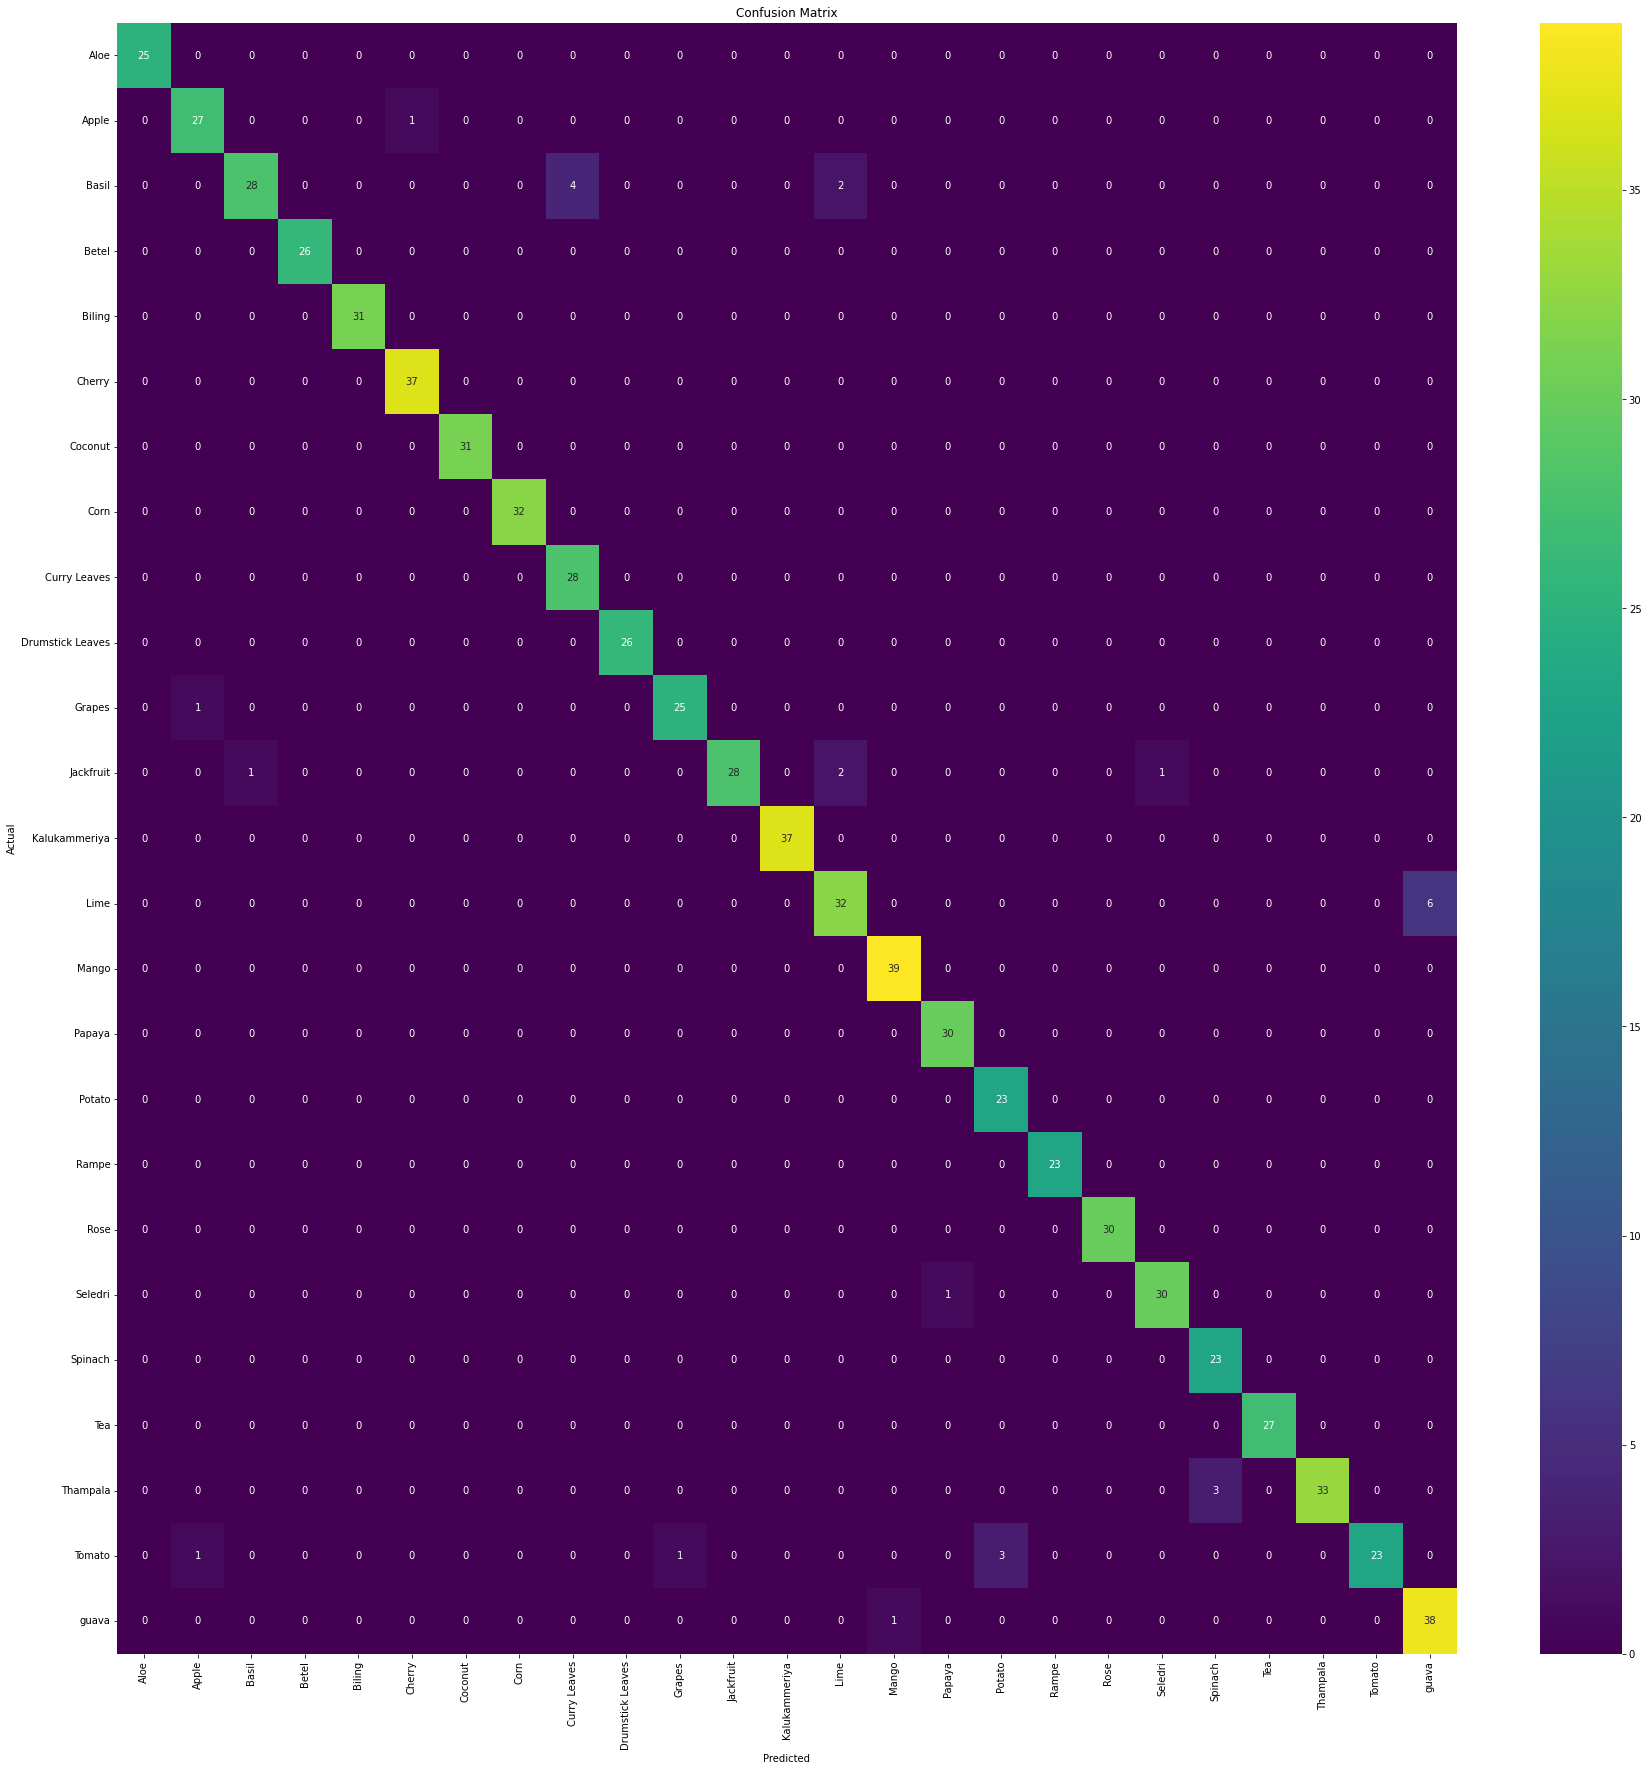

In [49]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(matrix, annot=True, cmap='viridis')
plt.xticks(ticks=np.arange(25) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(25) + 0.5, labels=test_images.class_indices, rotation=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fig.savefig("Confusion Matrix",dpi=700)

In [50]:
print("Classification Report:\n", report)

Classification Report:
                   precision    recall  f1-score   support

            Aloe       1.00      1.00      1.00        25
           Apple       0.93      0.96      0.95        28
           Basil       0.97      0.82      0.89        34
           Betel       1.00      1.00      1.00        26
          Biling       1.00      1.00      1.00        31
          Cherry       0.97      1.00      0.99        37
         Coconut       1.00      1.00      1.00        31
            Corn       1.00      1.00      1.00        32
    Curry Leaves       0.88      1.00      0.93        28
Drumstick Leaves       1.00      1.00      1.00        26
          Grapes       0.96      0.96      0.96        26
       Jackfruit       1.00      0.88      0.93        32
   Kalukammeriya       1.00      1.00      1.00        37
            Lime       0.89      0.84      0.86        38
           Mango       0.97      1.00      0.99        39
          Papaya       0.97      1.00      0.98

In [51]:
data_his = pd.DataFrame(history.history)
data_his

,loss,accuracy,val_loss,val_accuracy
0,1.211781,0.693230,0.419381,0.895480
1,0.194111,0.954161,0.224053,0.951977


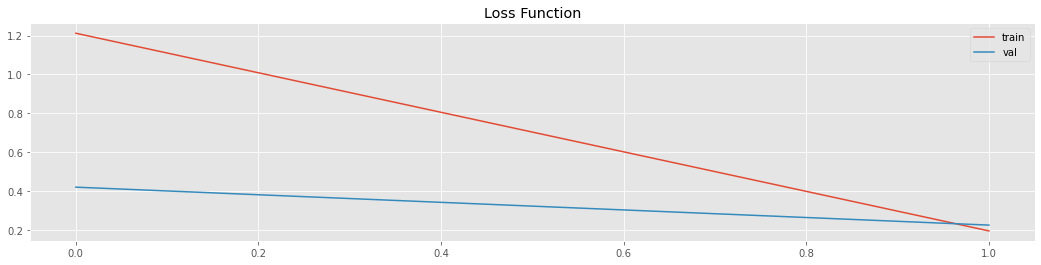

In [52]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

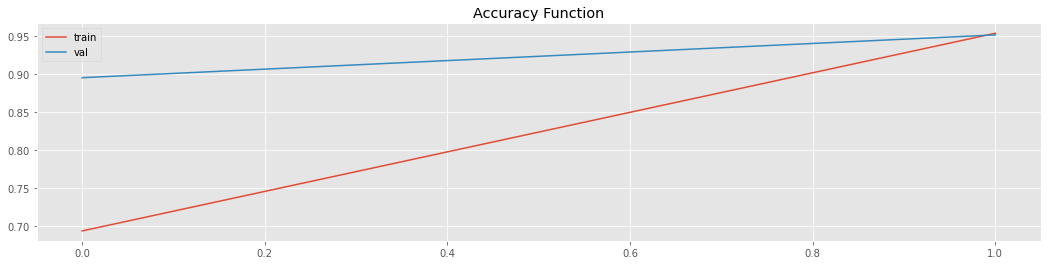

In [53]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function",dpi=700)

In [54]:
train_images.class_indices.keys()

dict_keys(['Aloe', 'Apple', 'Basil', 'Betel', 'Biling', 'Cherry', 'Coconut', 'Corn', 'Curry Leaves', 'Drumstick Leaves', 'Grapes', 'Jackfruit', 'Kalukammeriya', 'Lime', 'Mango', 'Papaya', 'Potato', 'Rampe', 'Rose', 'Seledri', 'Spinach', 'Tea', 'Thampala', 'Tomato', 'guava'])

In [55]:
train_images.class_indices.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [56]:
df=pd.DataFrame({'names':list(train_images.class_indices.keys()),
                 'index':list(train_images.class_indices.values())})

In [ ]:
df.iloc[0]['names']

In [57]:
model.save("leafmodel.h5")

In [2]:
model = tf.keras.models.load_model('leafmodel.h5')

In [10]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

# predictions = np.argmax(model.predict(test_images), axis=1)


# test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
#     preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

# test_images = test_generator.flow_from_dataframe(
#     dataframe=test_df,
#     x_col='Filepath',
#     y_col='Label',
#     target_size=(224, 224),
#     color_mode='rgb',
#     class_mode='categorical',
#     batch_size=32,
#     shuffle=False
# )

In [ ]:
Seledri             111
Rampe               111
Betel               106
Biling              106
Aloe                105
Basil               105
Papaya              105
Lime                105
guava               104
Jackfruit           103
Grapes              100
Apple               100
Kalukammeriya       100
Curry Leaves        100
Mango               100
Corn                100
Potato              100
Coconut             100
Rose                100
Cherry              100
Spinach             100
Thampala            100
Tomato              100
Drumstick Leaves     98
Tea                  73